In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import seaborn as sns

from extract_bed import extract_bed



In [2]:
ls -lh closest

total 3912800
-rw-r--r--  1 brendagaribay  staff   315M Jul  1 12:03 stopcodonsprojections.bed
-rw-r--r--  1 brendagaribay  staff   1.6G Jul 21 22:17 stopcodonssoma.bed


In [3]:
soma_df = extract_bed('closest/stopcodonssoma.bed')
projections_df = extract_bed('closest/stopcodonsprojections.bed')
soma_df
projections_df

/Users/brendagaribay/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (0,6,13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/brendagaribay/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (0,6,13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,chrom,chromstart,chromend,name,score,strand,chrom,source,feature,thickstart,thickend,score/strand,strand,score,geneinfo,distance,gene_name,gene_id,exon_number,gene_biotype
17,1,1731005,1731062,NB501950:174:H3TG7BGXC:3:13403:8002:7462,42,+,1,ensembl,stop_codon,1729595,1729597,.,+,0,"gene_id ""ENSRNOG00000014303""; gene_version ""6""...",-1409,Lrp11,ENSRNOG00000014303,7,protein_coding
18,1,1731101,1731161,NB501950:174:H3TG7BGXC:1:23206:4286:13989,42,+,1,ensembl,stop_codon,1729595,1729597,.,+,0,"gene_id ""ENSRNOG00000014303""; gene_version ""6""...",-1505,Lrp11,ENSRNOG00000014303,7,protein_coding
19,1,1731102,1731162,NB501950:174:H3TG7BGXC:2:23110:9193:15795,42,+,1,ensembl,stop_codon,1729595,1729597,.,+,0,"gene_id ""ENSRNOG00000014303""; gene_version ""6""...",-1506,Lrp11,ENSRNOG00000014303,7,protein_coding
20,1,1731102,1731162,NB501950:174:H3TG7BGXC:1:21309:13142:4294,42,+,1,ensembl,stop_codon,1729595,1729597,.,+,0,"gene_id ""ENSRNOG00000014303""; gene_version ""6""...",-1506,Lrp11,ENSRNOG00000014303,7,protein_coding
21,1,1731128,1731185,NB501950:174:H3TG7BGXC:3:12608:6445:12334,42,+,1,ensembl,stop_codon,1729595,1729597,.,+,0,"gene_id ""ENSRNOG00000014303""; gene_version ""6""...",-1532,Lrp11,ENSRNOG00000014303,7,protein_coding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797005,Y,933667,933699,NB501950:174:H3TG7BGXC:4:23507:21597:4278,42,+,Y,ensembl_havana,stop_codon,933389,933391,.,+,0,"gene_id ""ENSRNOG00000060048""; gene_version ""2""...",-277,Eif2s3y,ENSRNOG00000060048,12,protein_coding
797006,Y,933915,933944,NB501950:174:H3TG7BGXC:2:21303:7525:20392,42,+,Y,ensembl_havana,stop_codon,933389,933391,.,+,0,"gene_id ""ENSRNOG00000060048""; gene_version ""2""...",-525,Eif2s3y,ENSRNOG00000060048,12,protein_coding
797007,Y,933915,933944,NB501950:174:H3TG7BGXC:1:21107:24866:5192,42,+,Y,ensembl_havana,stop_codon,933389,933391,.,+,0,"gene_id ""ENSRNOG00000060048""; gene_version ""2""...",-525,Eif2s3y,ENSRNOG00000060048,12,protein_coding
797017,Y,1268152,1268201,NB501950:174:H3TG7BGXC:4:22511:4826:19141,1,+,Y,ensembl,stop_codon,1260521,1260523,.,-,0,"gene_id ""ENSRNOG00000058664""; gene_version ""2""...",-7630,Usp9y,ENSRNOG00000058664,47,protein_coding


In [4]:
# For gene specific dataframe
def count_peaks(df, gene_name, axis=None, label=None):
    fdf = df[df['gene_name'] == gene_name]

    df_hist_y, df_hist_x = np.histogram(abs(fdf['distance']), bins=1000, range=(0, 10000))
    
    peaks, __ = find_peaks(df_hist_y, distance=150)
    
    filtered_peaks = []
    
    for peak in peaks:
        if df_hist_y[peak] > 0.001*sum(df_hist_y) and df_hist_y[peak] >= 5:
            filtered_peaks.append(peak)
            
    df_hist_y = df_hist_y/sum(df_hist_y)

    if axis is None:
        plt.figure(figsize=(20,10))
        axis = plt.gca()
    
    axis.plot(df_hist_y, label=label)
    axis.plot(peaks, df_hist_y[peaks], 'x')
    axis.plot(filtered_peaks, df_hist_y[filtered_peaks], 'o')
    plt.title(list(fdf['gene_name'])[0], fontweight='bold')
    plt.ylabel('Frequency of Gene Reads', fontweight='bold') # y axis title
    plt.xlabel('Distance of UTR (kbp)', y = 1, fontweight='bold')
    plt.legend(frameon = False) # code for legend
    sns.despine() # graphic aesthetics for box
    
    return filtered_peaks


def compare_samples(df1, df2, gene_name, labels=[1, 2]):
    plt.figure(figsize=(20,10))
    axis = plt.gca()
    
    count_peaks(df1, gene_name, axis, label=labels[0])
    count_peaks(df2, gene_name, axis, label=labels[1])
    

In [5]:
fdf = soma_df.groupby('gene_name').filter(lambda x: len(x) > 5000)
unique_gene_names = list(set(fdf['gene_name']))

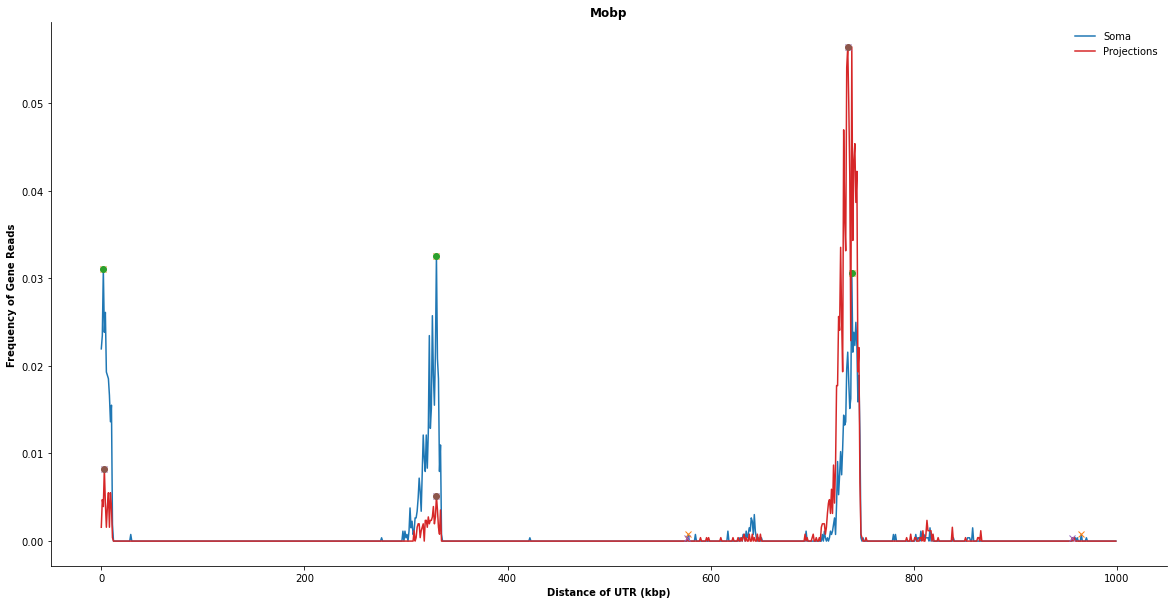

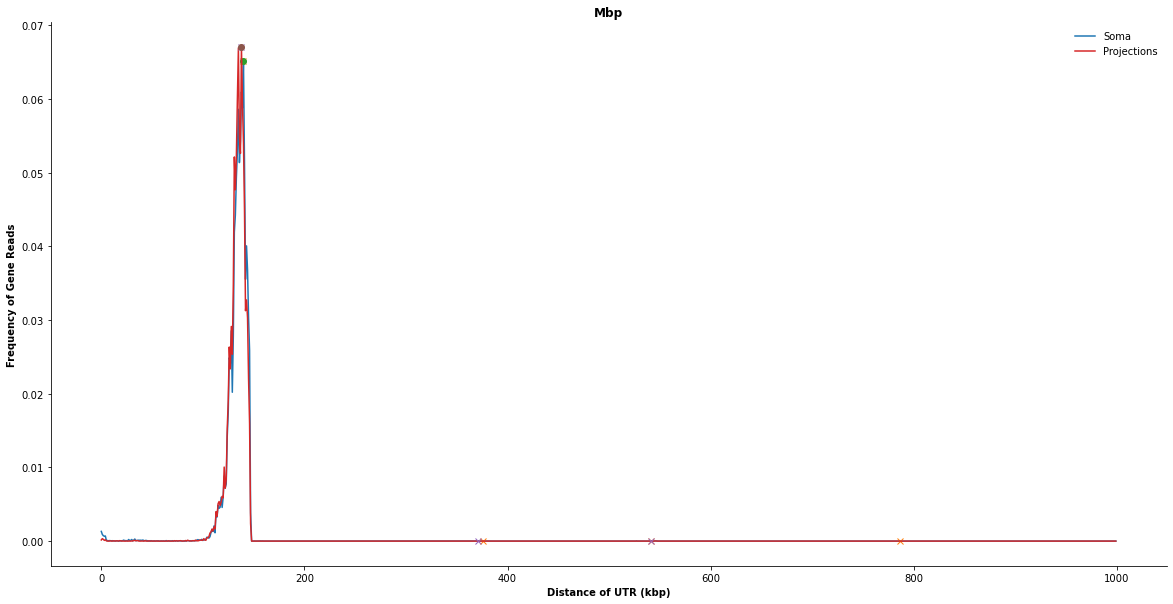

In [6]:
compare_samples(soma_df, projections_df, 'Mobp', labels=['Soma', 'Projections'])
compare_samples(soma_df, projections_df, 'Mbp', labels=['Soma', 'Projections'])

In [5]:
#soma = set(soma_df['distance'])

In [8]:
len(set(projections_df['gene_name']))

9536

In [6]:
#sdf = soma_df.groupby(by=['distance']).sum()
#pdf = projections_df.groupby(by=['distance']).sum()
#len(set(df['gene_name']))
#sdf
#pdf

Pi16
Zc3h10
Mt-co1
Mbp
Cfl1
Iffo1
Tubb4a
Rnd2
Gnas
Apoe
Wscd1
Septin4
Mt-nd5
Phyhipl
Scd2
Actb
Sirt2
Mt-atp6
Dapk3
Slc25a38
Bin1
Plp1


<ipython-input-4-ca3f96385775>:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))


Pebp1
Mt-atp8
Tubb2b
Grtp1
NEWGENE_2134
Cnp
Eno1
Aldoc


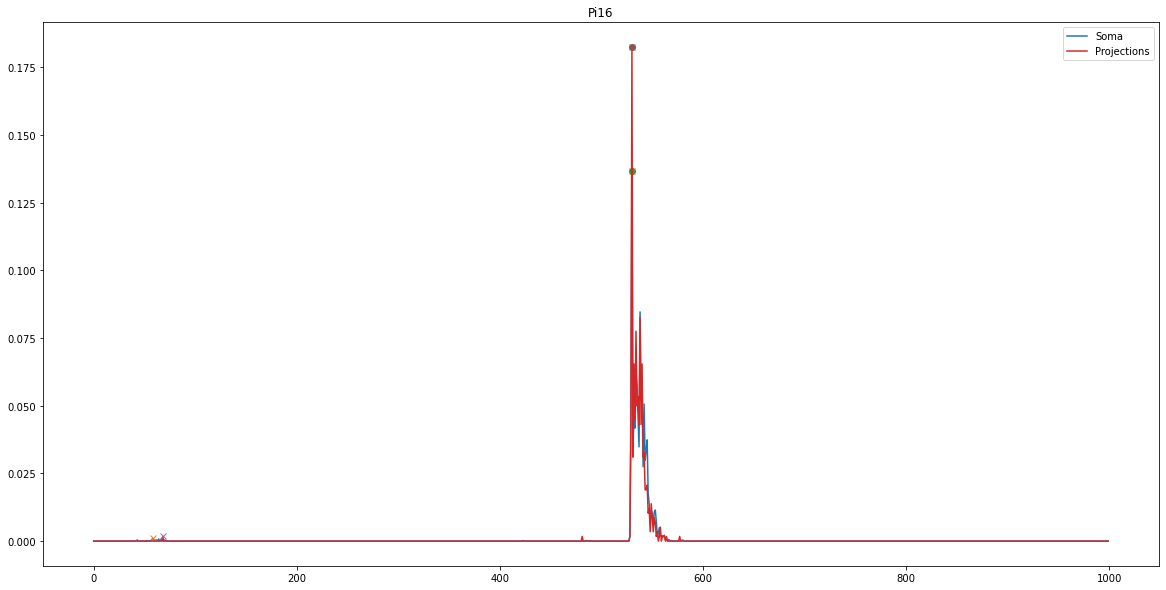

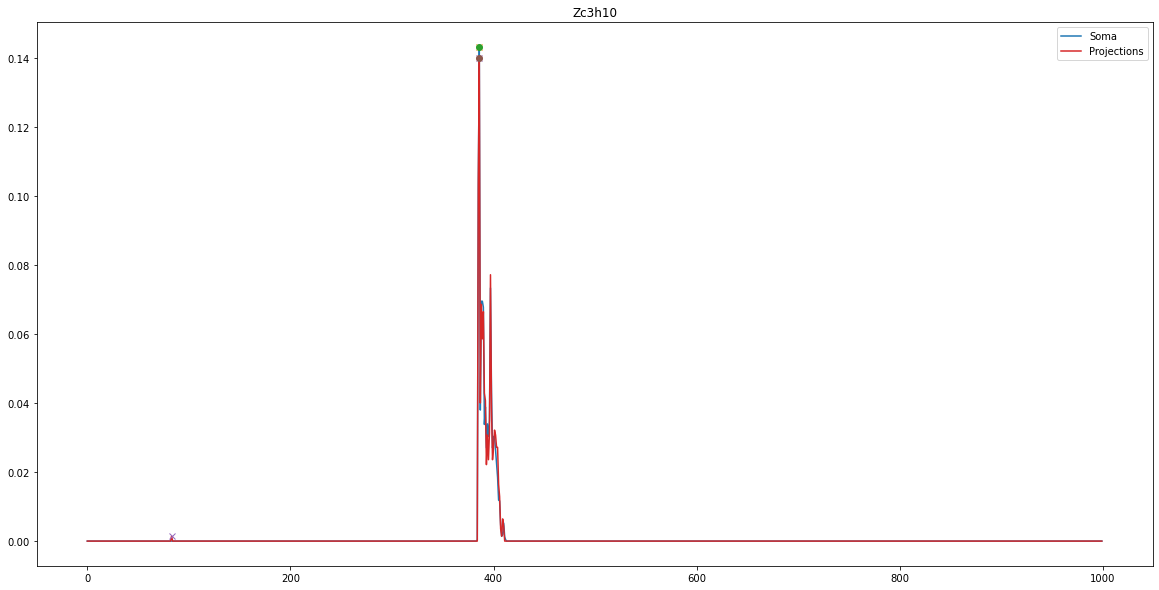

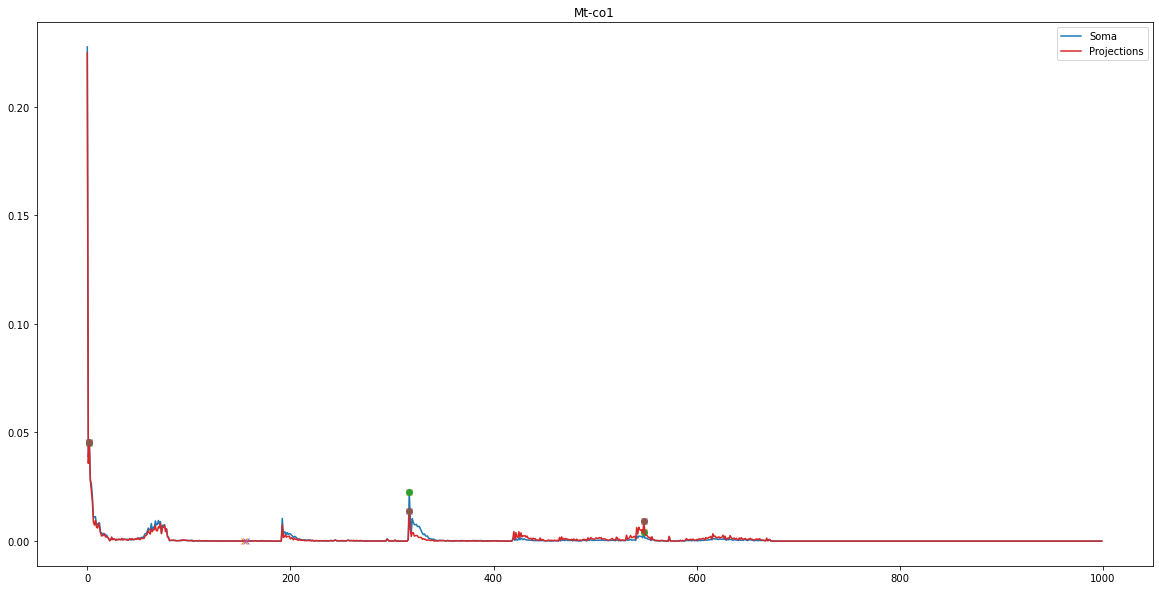

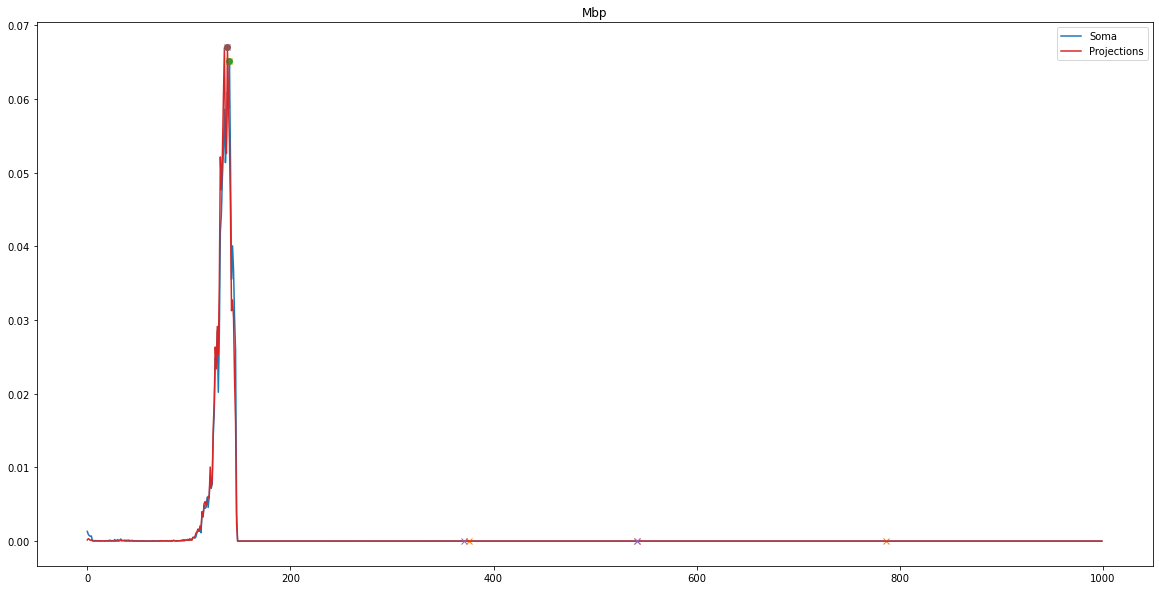

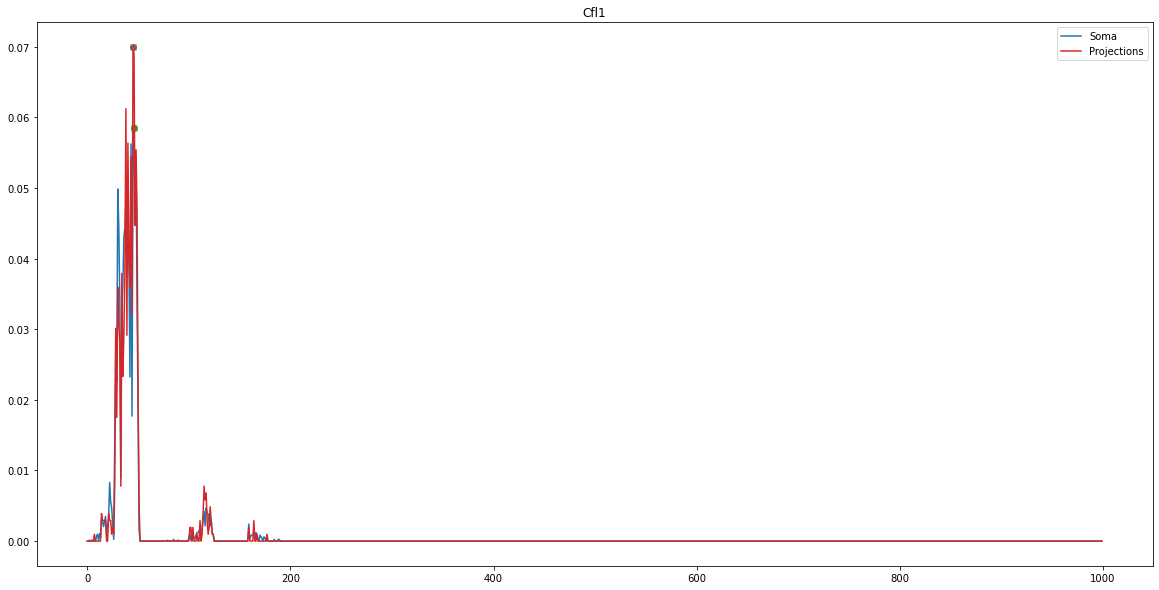

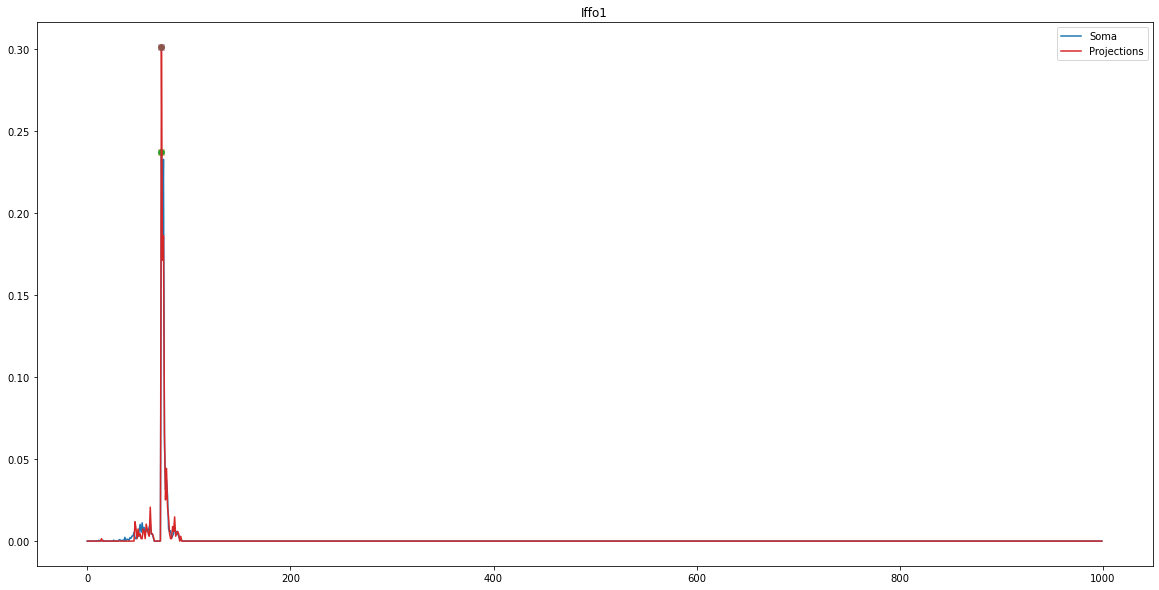

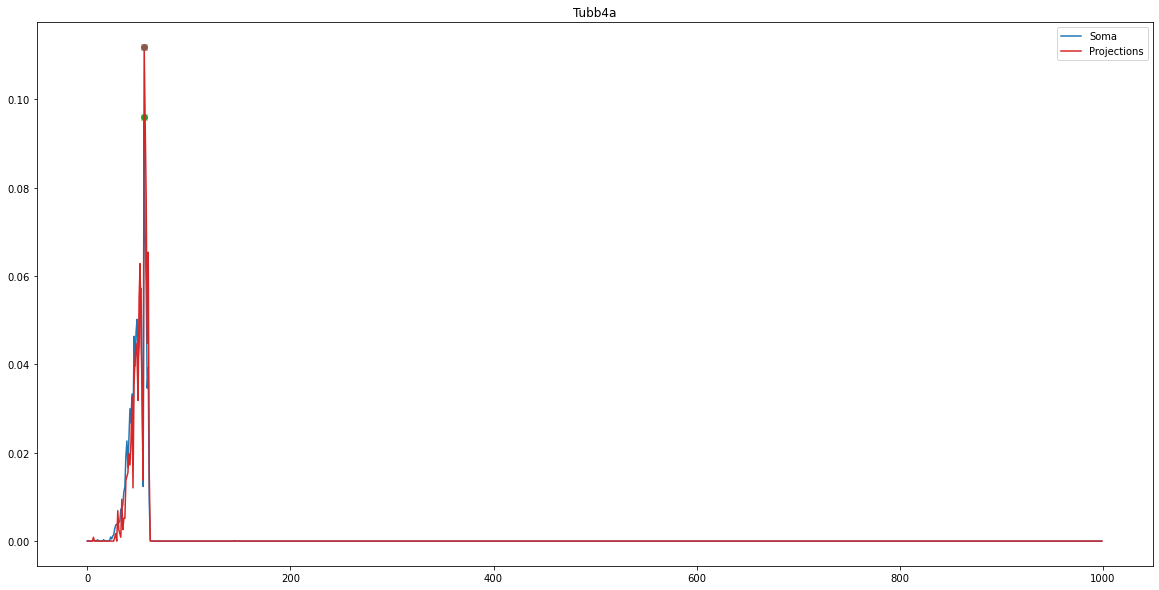

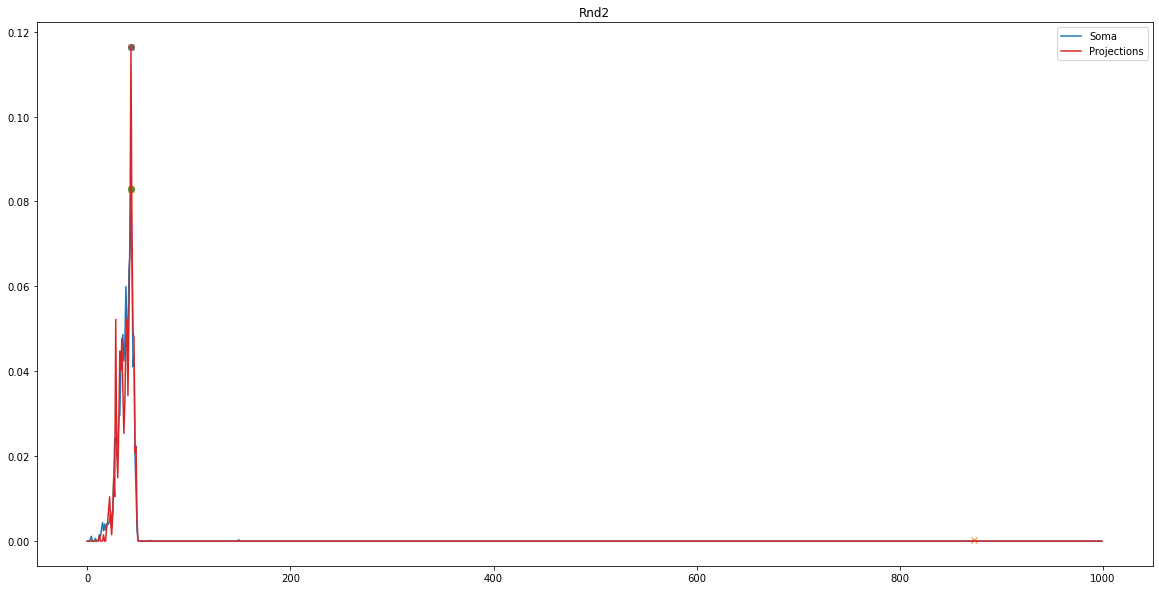

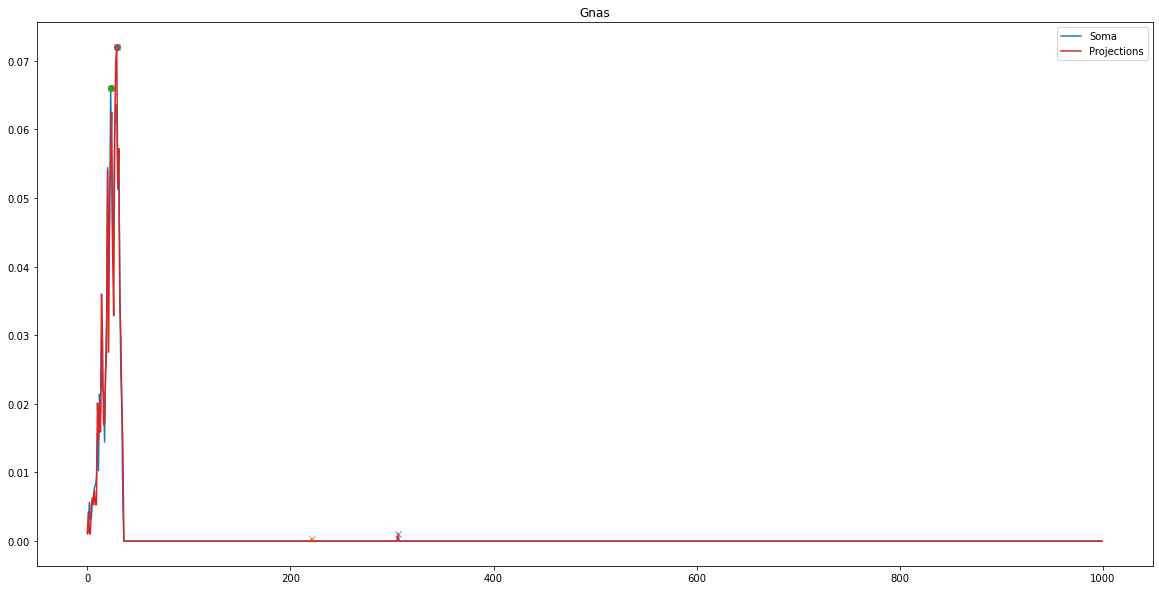

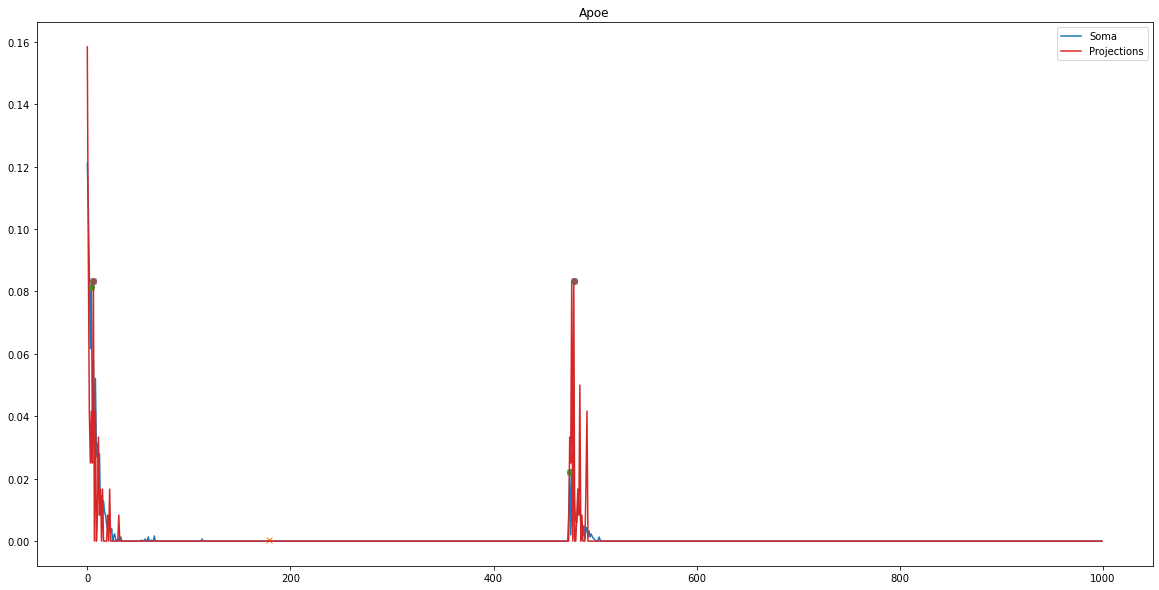

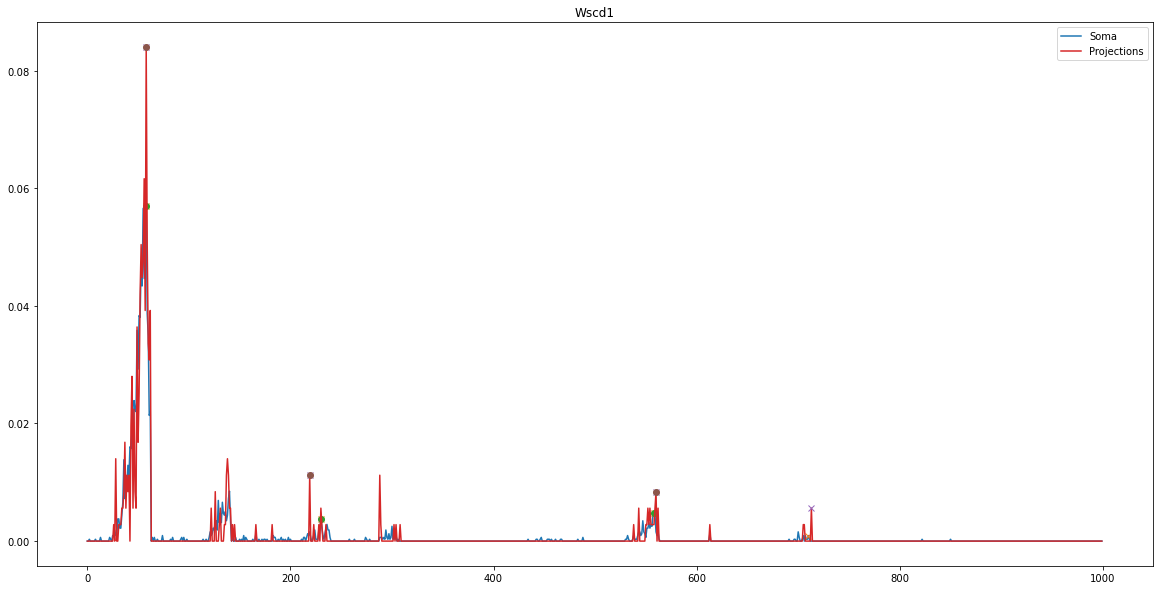

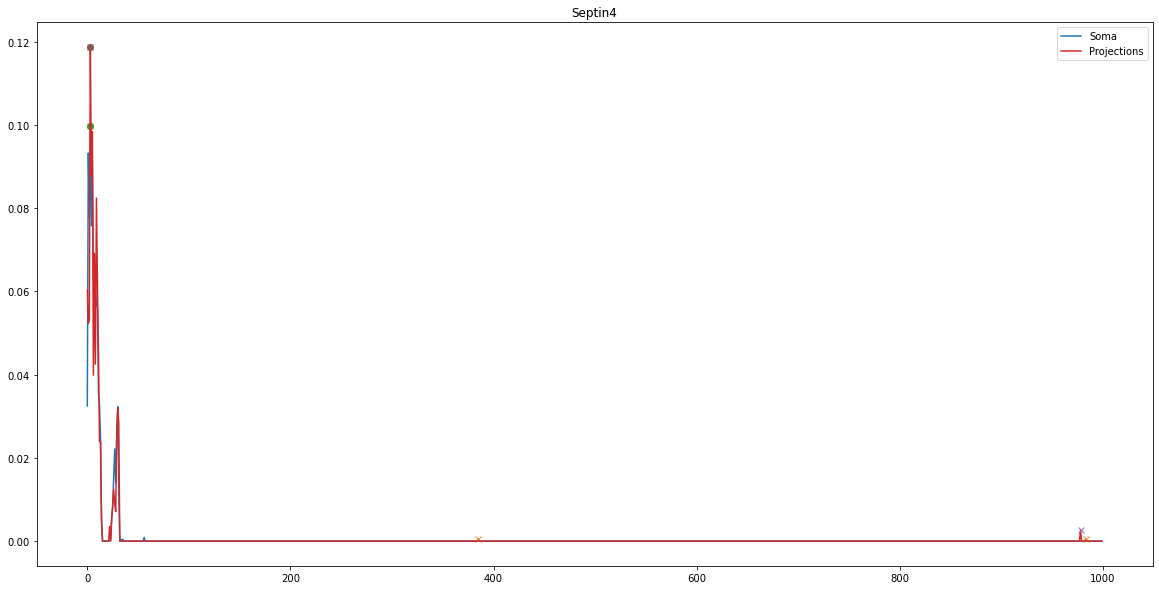

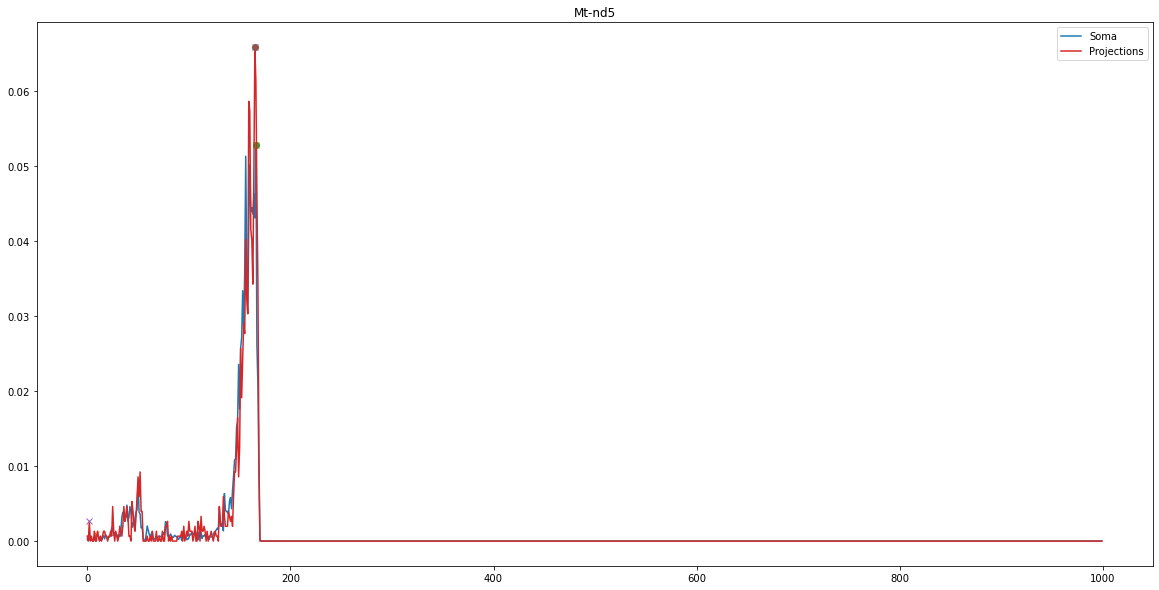

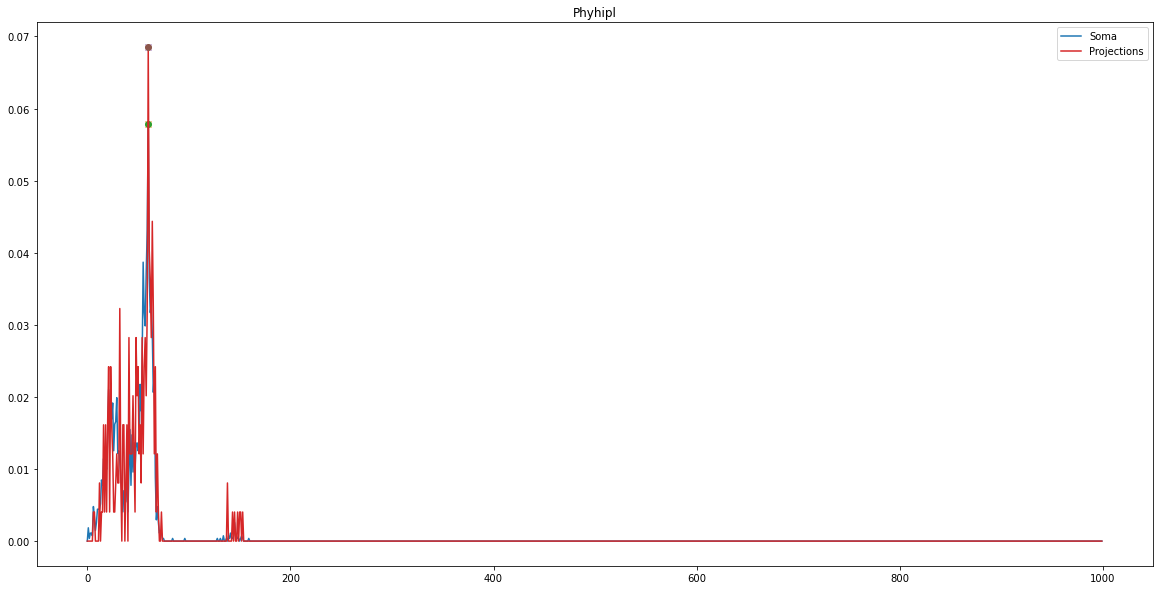

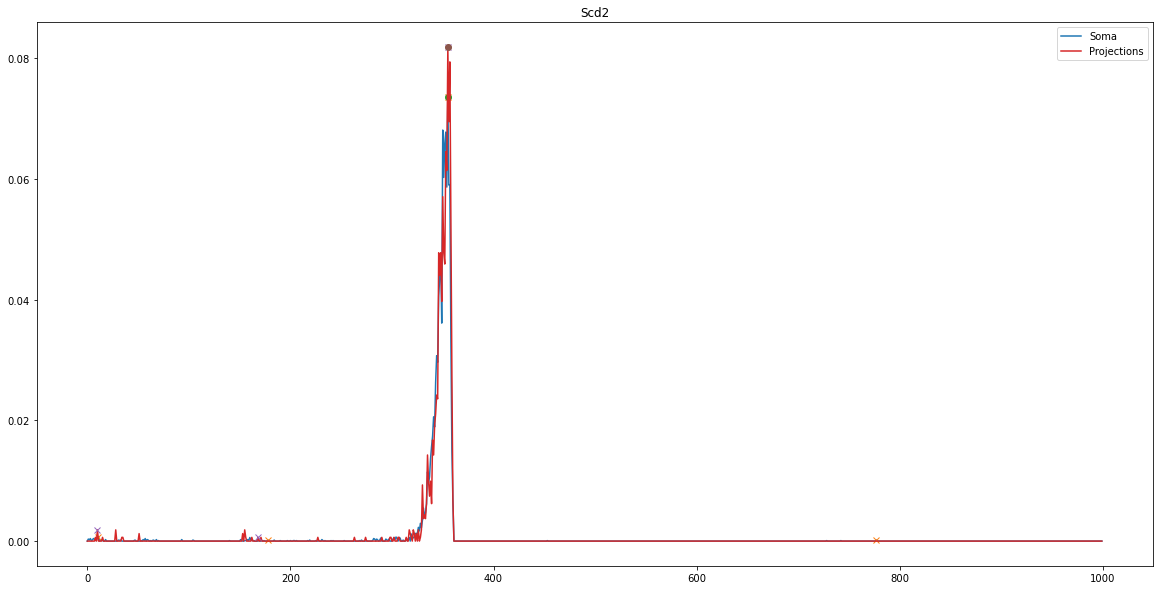

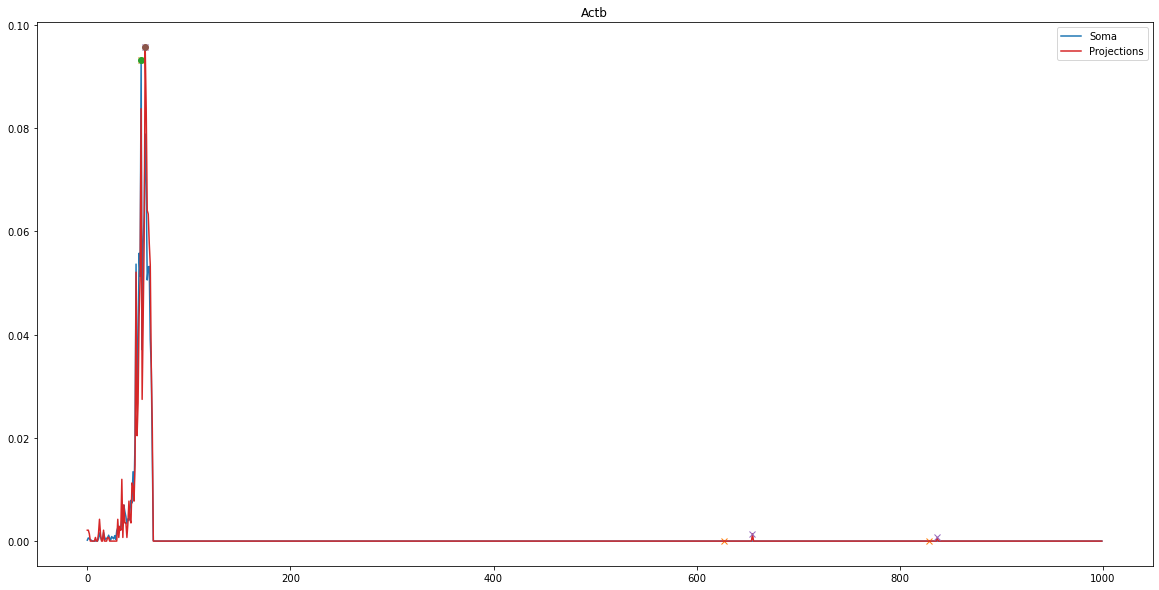

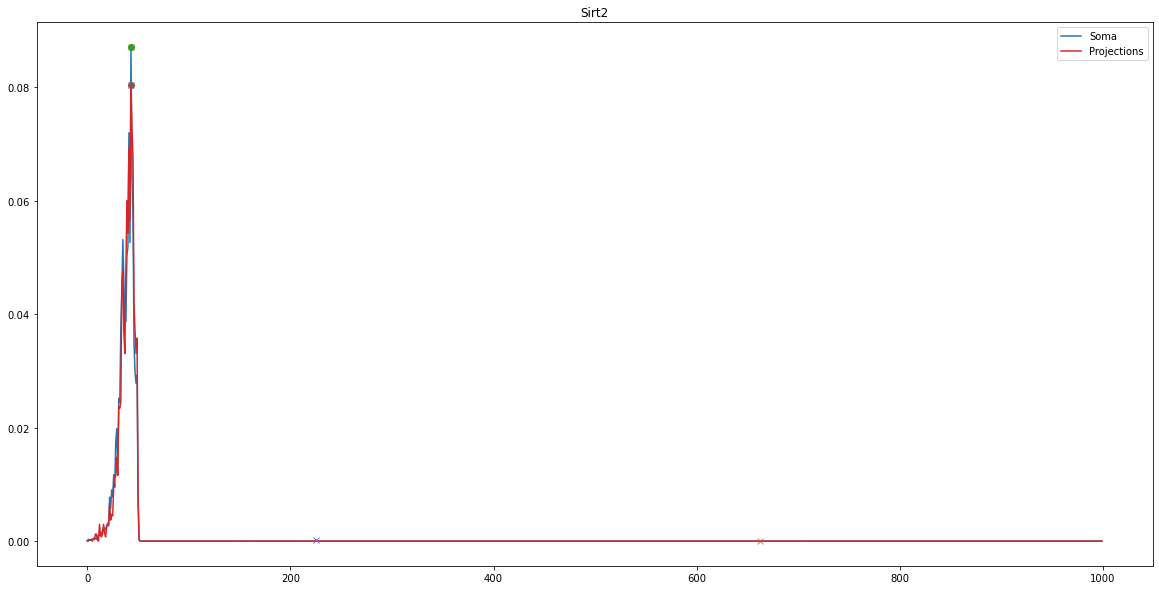

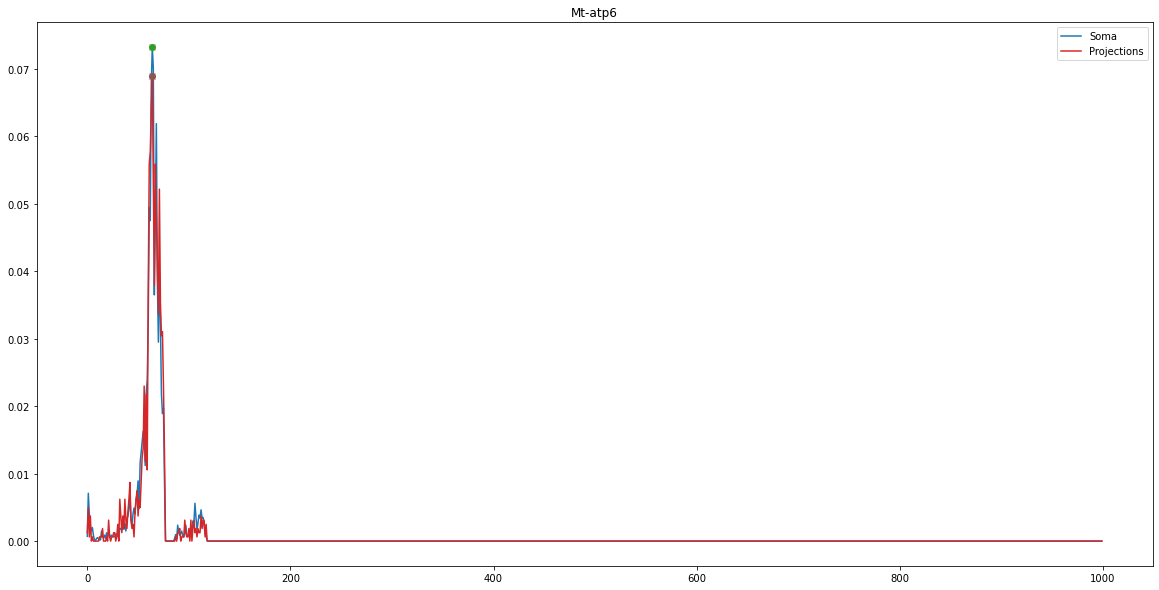

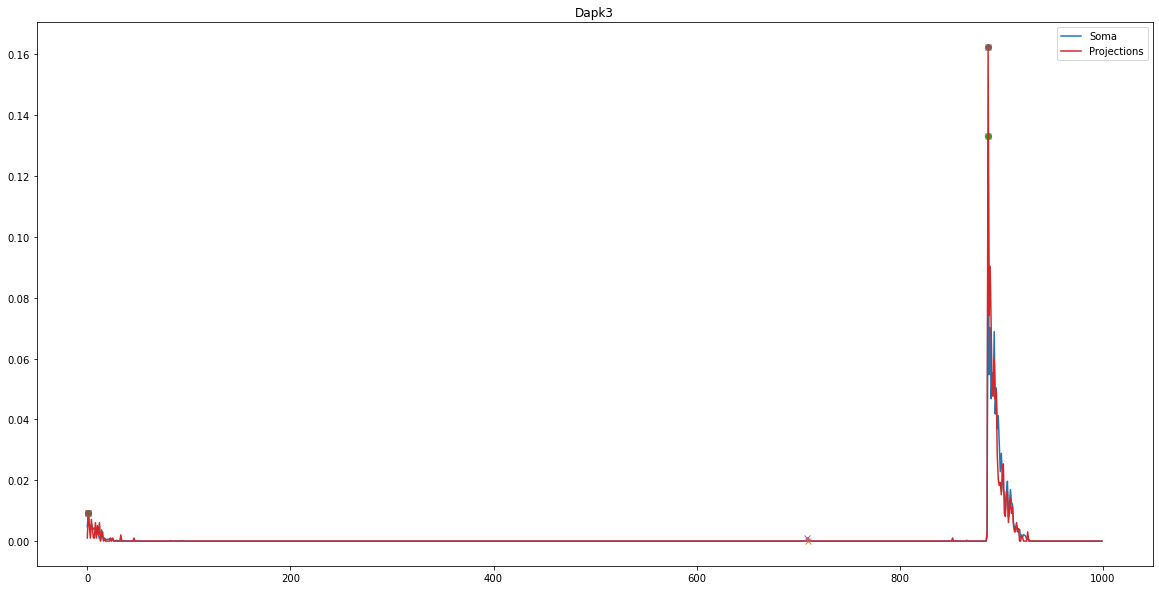

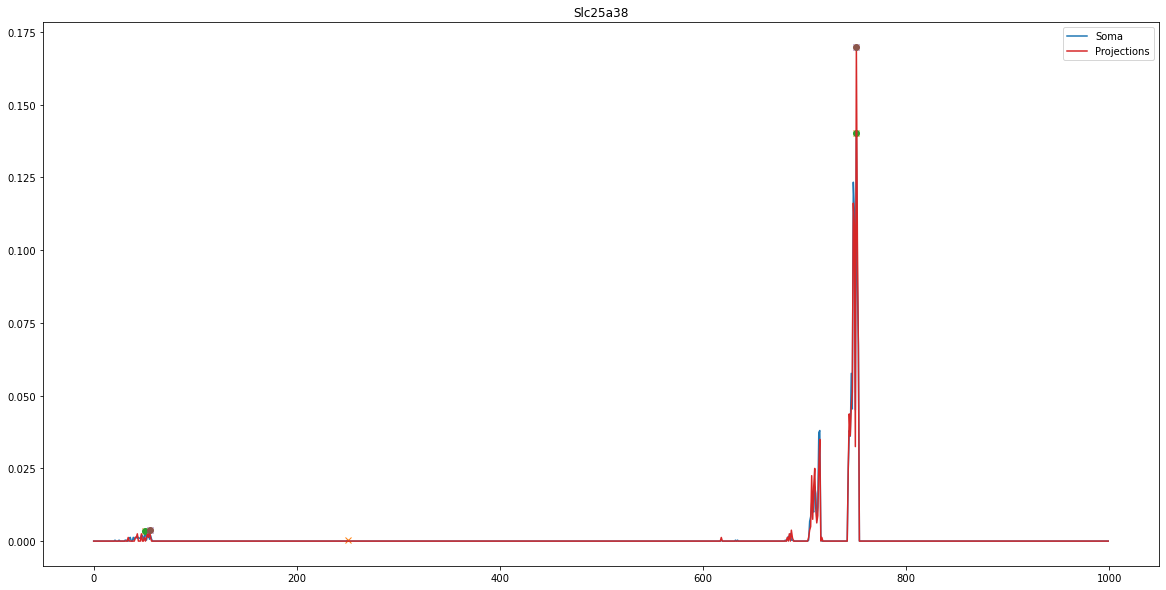

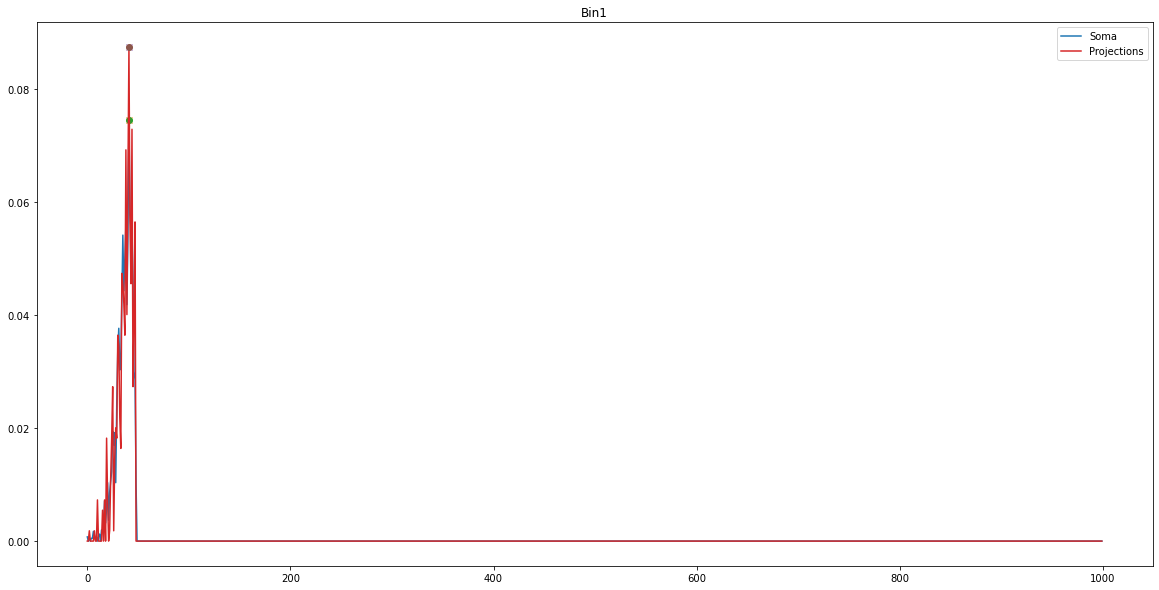

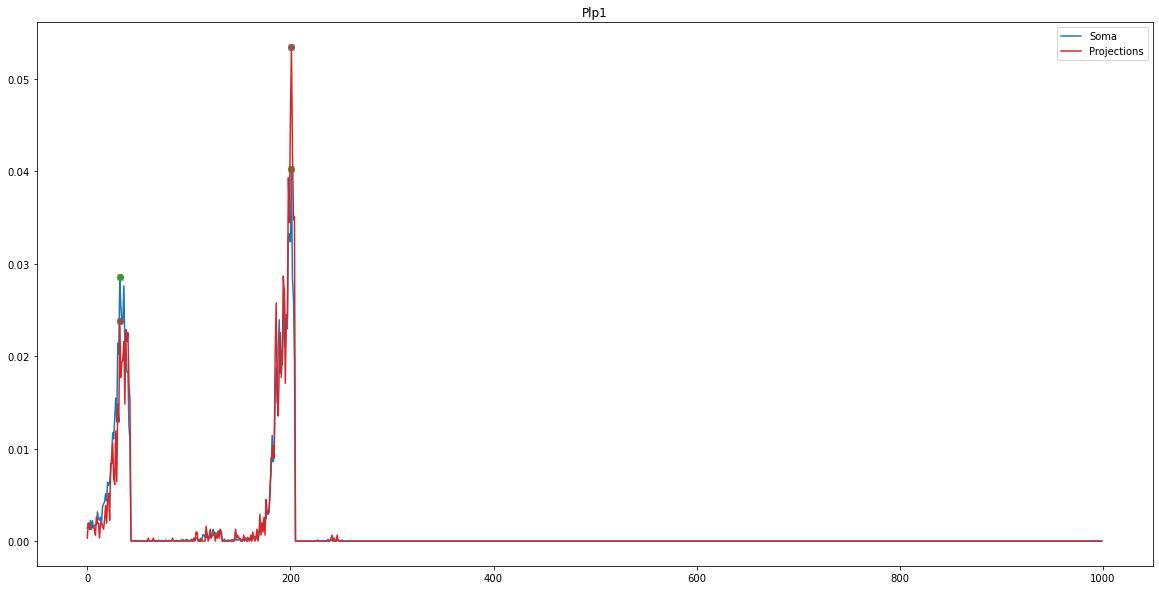

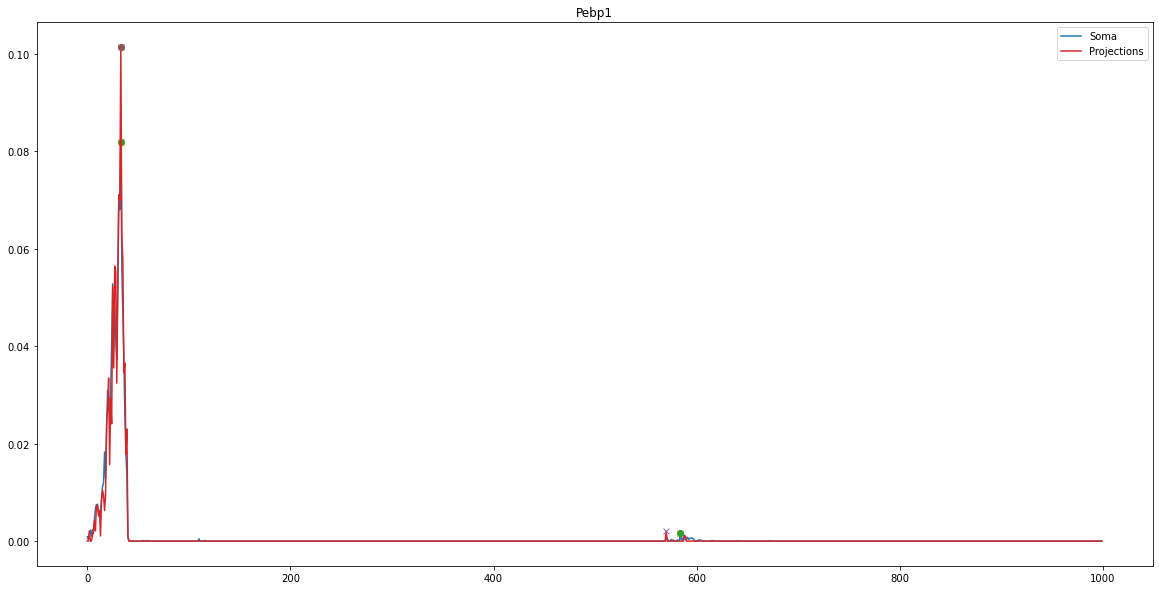

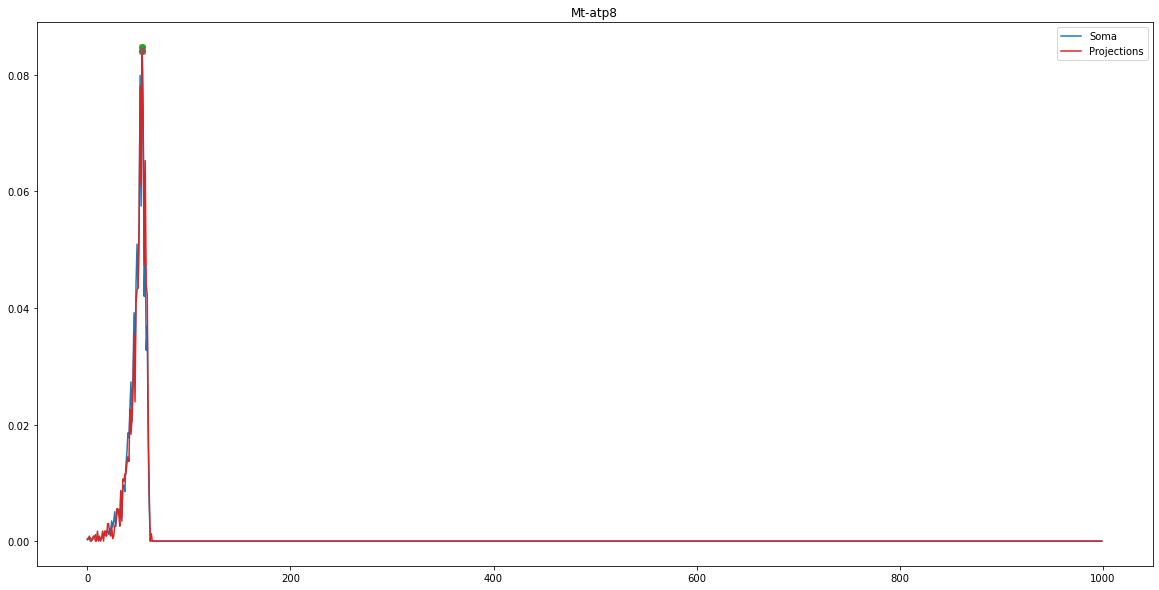

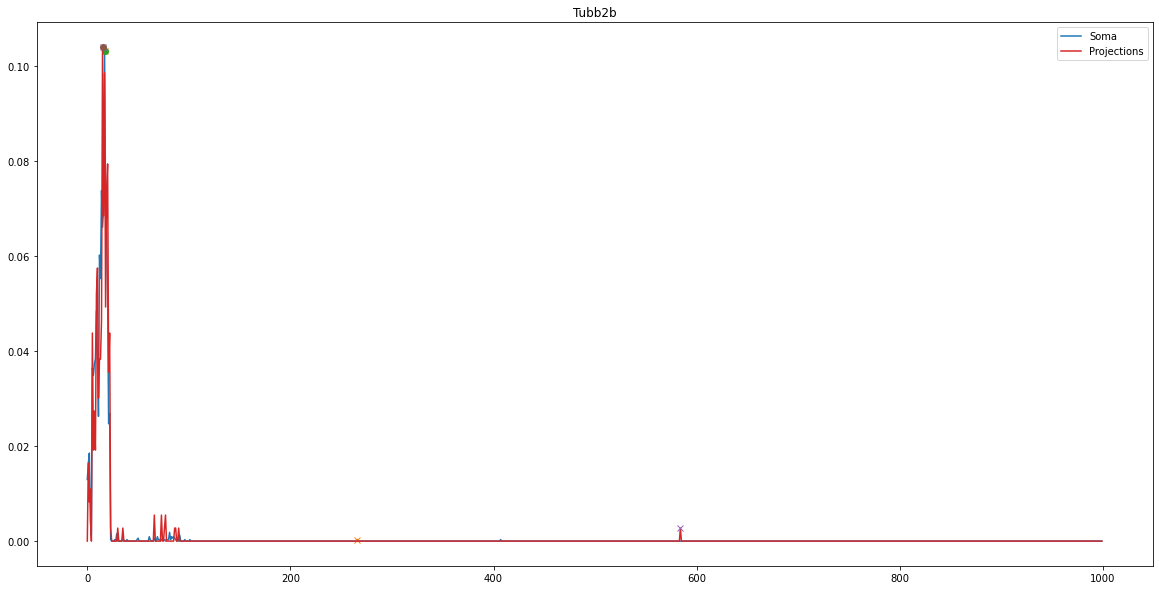

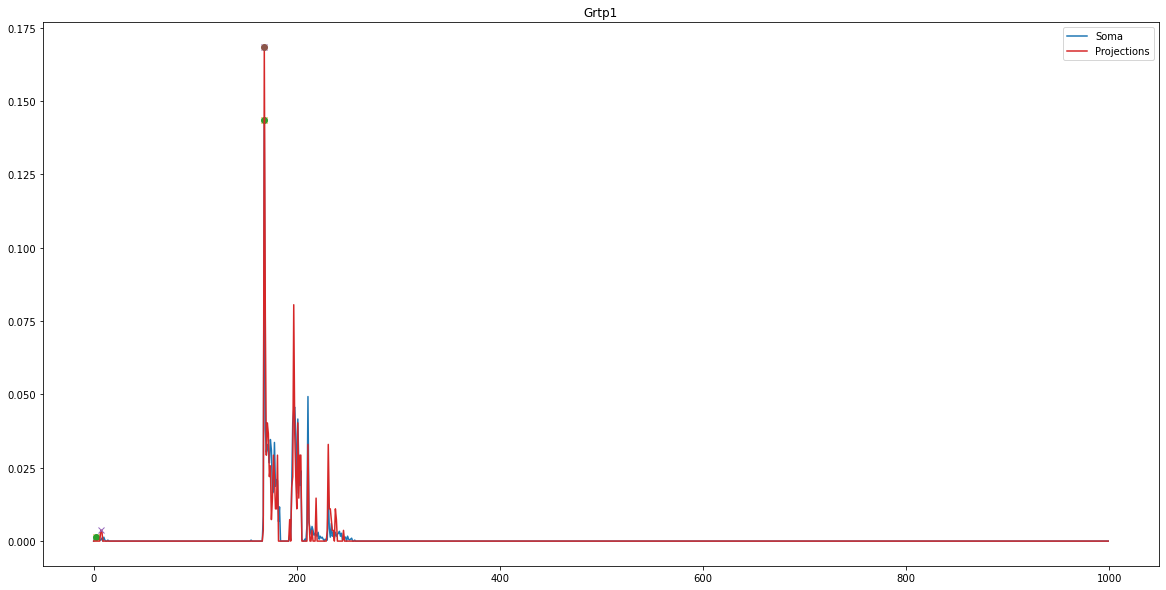

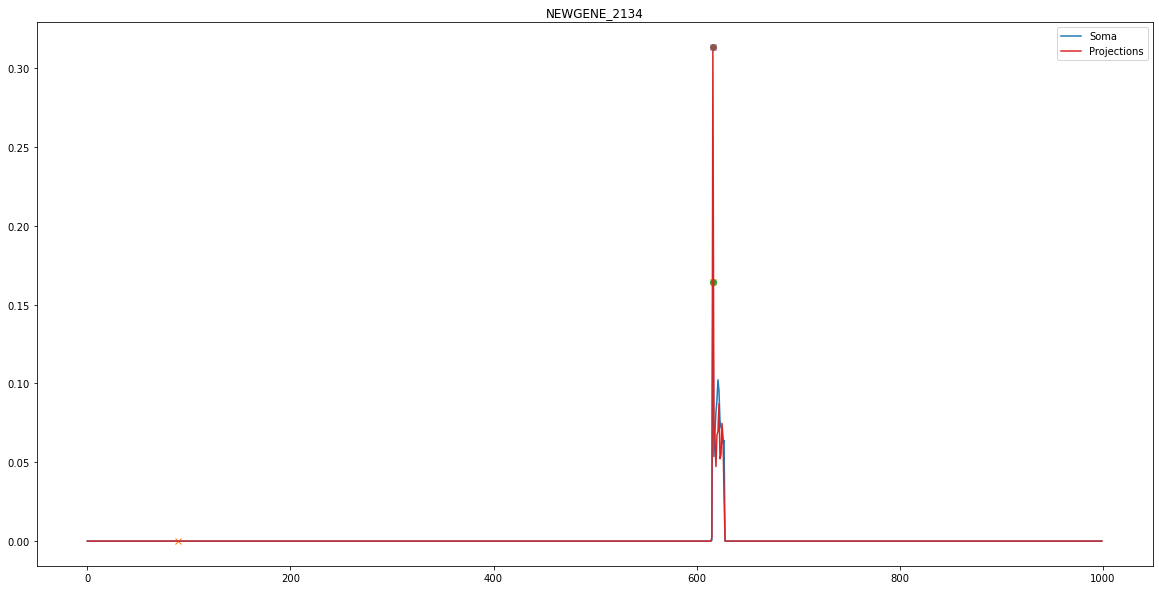

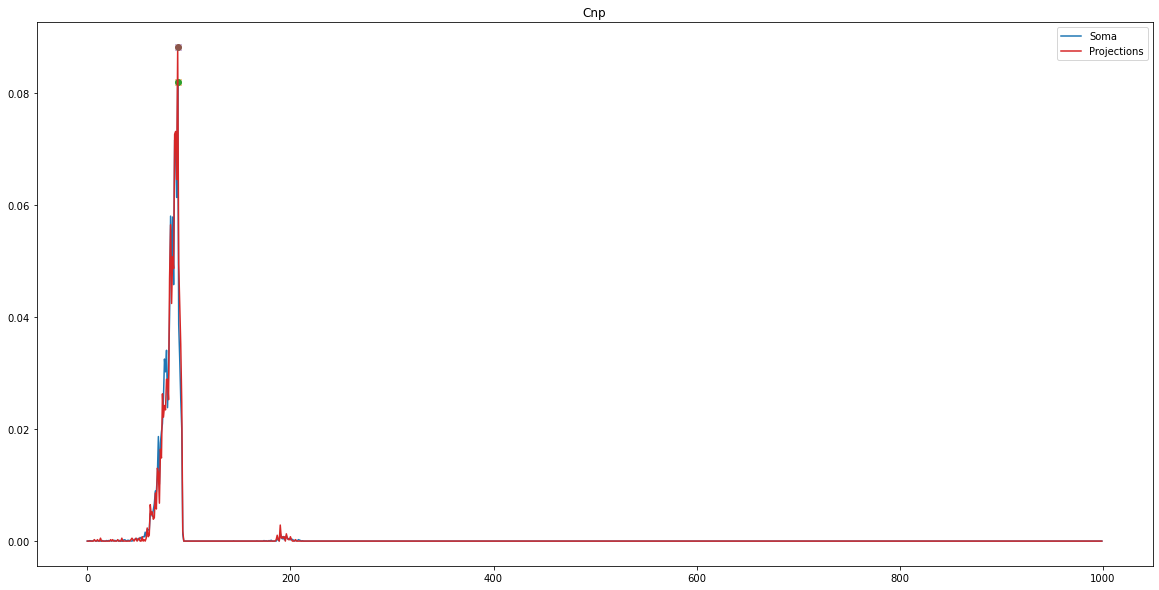

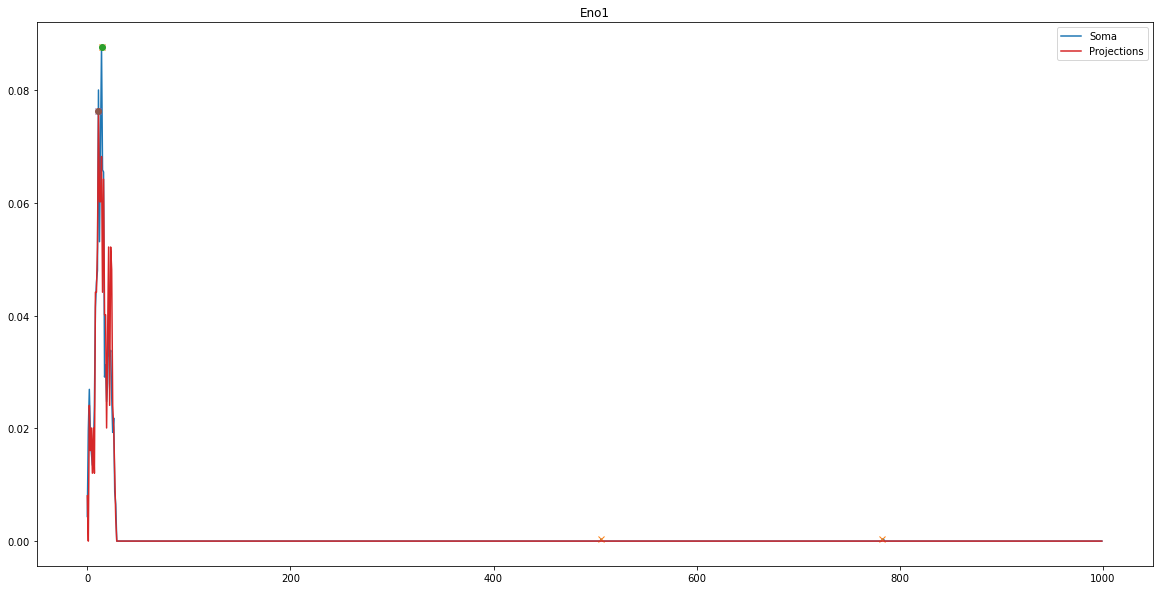

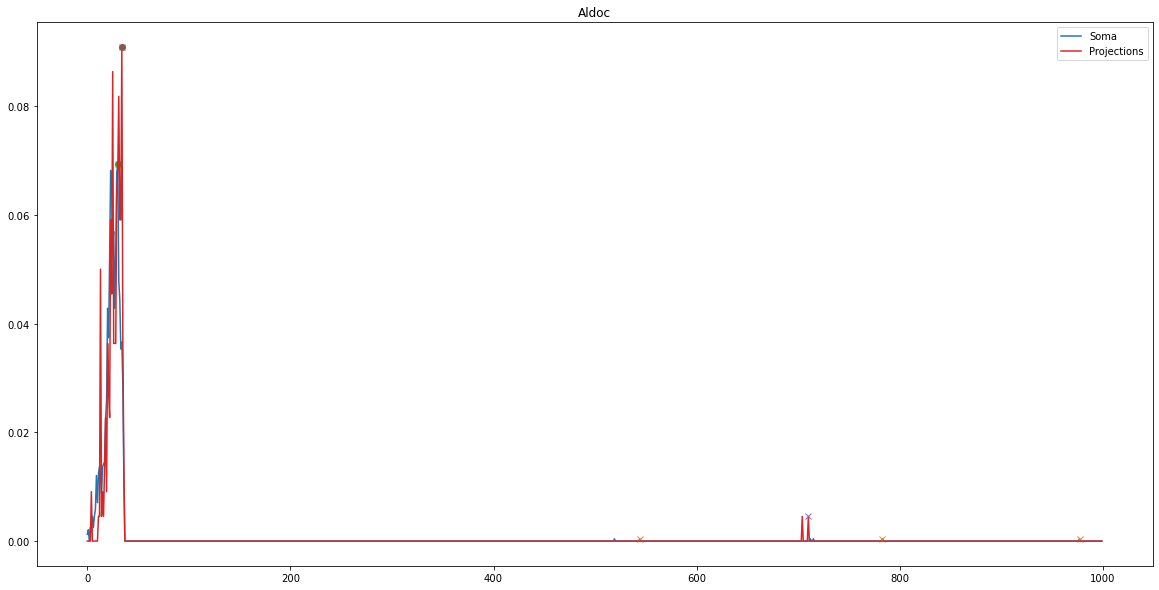

In [7]:
for gene_name in unique_gene_names:
    print(gene_name)
    compare_samples(soma_df, projections_df, gene_name, labels=['Soma', 'Projections'])

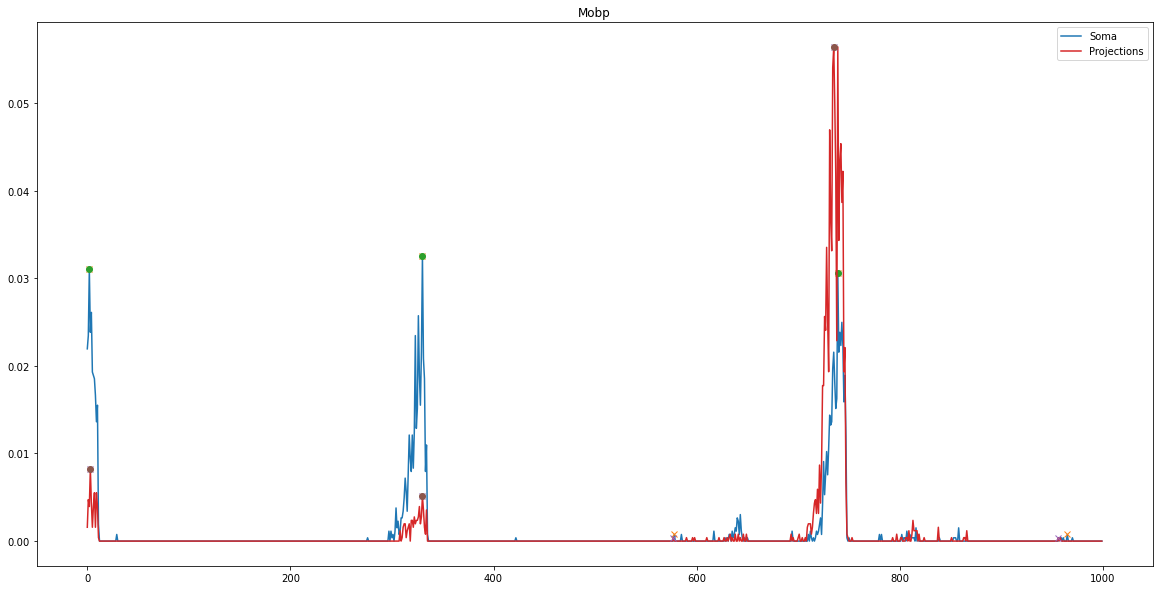

In [8]:
compare_samples(soma_df, projections_df, 'Mobp', labels=['Soma', 'Projections'])

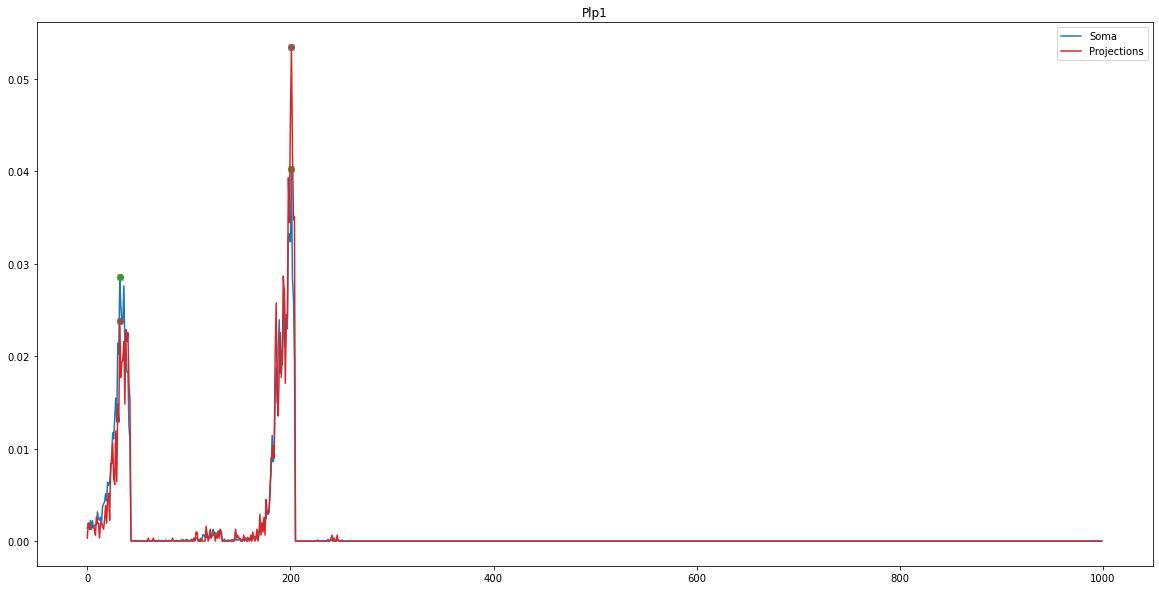

In [9]:
compare_samples(soma_df, projections_df, 'Plp1', labels=['Soma', 'Projections'])